# Practice Lab

# Part 1

In [55]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

# Part 2

In [12]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


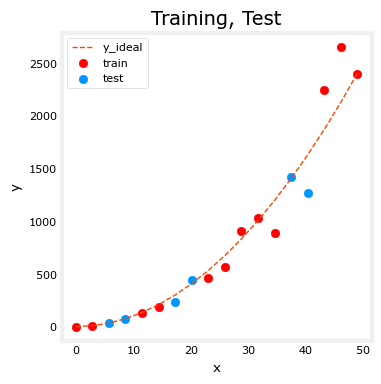

In [13]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

# EX 1

In [14]:
def eval_mse(y, yhat):
    m = len(y)
    err = 0.0
    for i in range(m):
        err += (y[i] - yhat[i]) ** 2
    err = err/(2*m)  
    return err


In [15]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


In [16]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

In [17]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


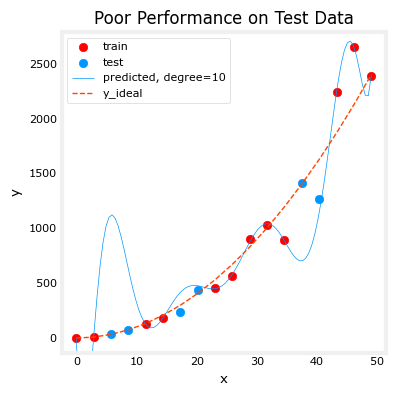

In [18]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

In [19]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


# Part 3

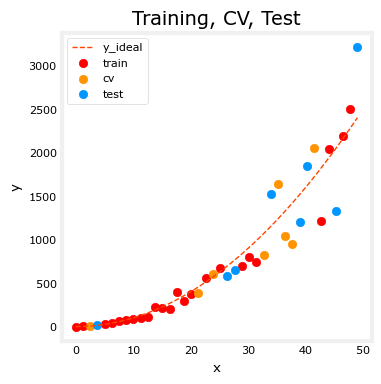

In [20]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

In [24]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

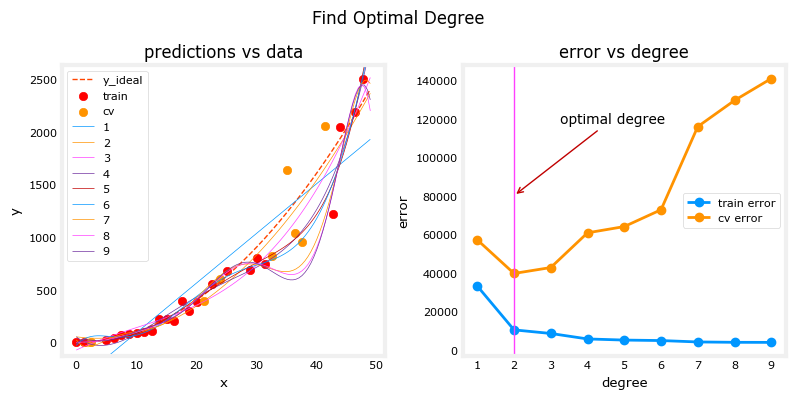

In [25]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

In [28]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

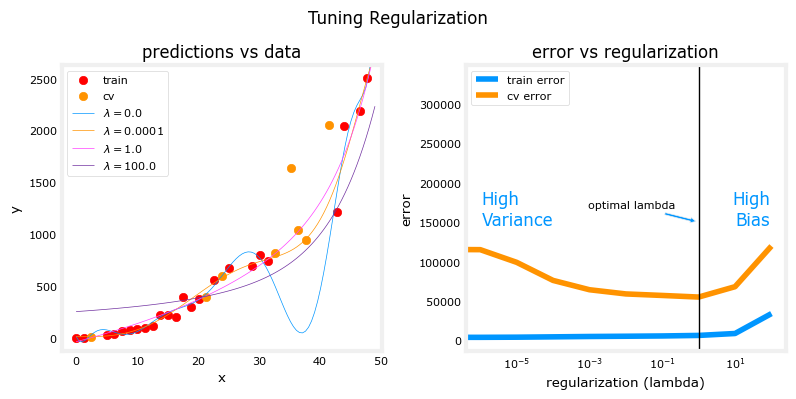

In [32]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

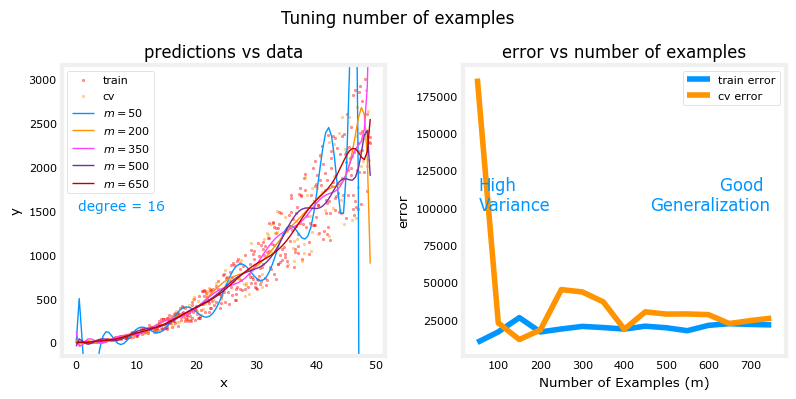

In [33]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

# Part 4

In [34]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


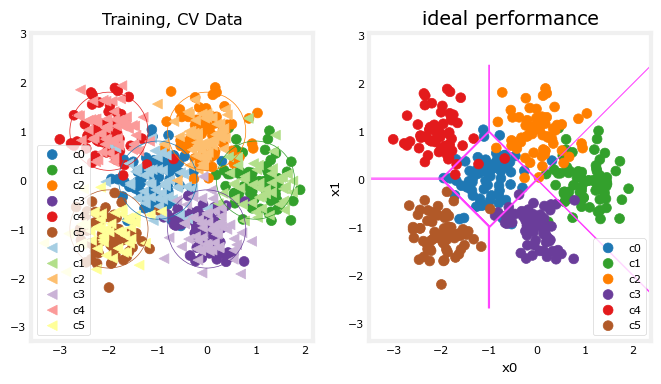

In [35]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

# EX 2

In [54]:
def eval_cat_err(y, yhat):
    m = len(y)
    incorrect = 0
    for i in range(m):
        if y[i] != yhat[i]:
            incorrect += 1
    
    cerr = incorrect / m 
    return cerr


In [37]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


# Part 5

# EX 3

In [38]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.random.set_seed(1234)

model = Sequential(
    [
        Dense(120, activation='relu'),  
        Dense(40, activation='relu'),  
        Dense(6, activation="linear")
    ],
    name="Complex"
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
)


In [57]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 649us/step - loss: 0.0272
Epoch 2/1000
13/13 [==============================] - 0s 472us/step - loss: 0.0253
Epoch 3/1000
13/13 [==============================] - 0s 420us/step - loss: 0.0313
Epoch 4/1000
13/13 [==============================] - 0s 425us/step - loss: 0.0257
Epoch 5/1000
13/13 [==============================] - 0s 400us/step - loss: 0.0315
Epoch 6/1000
13/13 [==============================] - 0s 433us/step - loss: 0.0242
Epoch 7/1000
13/13 [==============================] - 0s 451us/step - loss: 0.0279
Epoch 8/1000
13/13 [==============================] - 0s 457us/step - loss: 0.0373
Epoch 9/1000
13/13 [==============================] - 0s 474us/step - loss: 0.0847
Epoch 10/1000
13/13 [==============================] - 0s 526us/step - loss: 0.0709
Epoch 11/1000
13/13 [==============================] - 0s 472us/step - loss: 0.0703
Epoch 12/1000
13/13 [==============================] - 0s 480us/step - loss: 0.0903
E

13/13 [==============================] - 0s 431us/step - loss: 0.0727
Epoch 99/1000
13/13 [==============================] - 0s 458us/step - loss: 0.0467
Epoch 100/1000
13/13 [==============================] - 0s 439us/step - loss: 0.0522
Epoch 101/1000
13/13 [==============================] - 0s 456us/step - loss: 0.0538
Epoch 102/1000
13/13 [==============================] - 0s 434us/step - loss: 0.0639
Epoch 103/1000
13/13 [==============================] - 0s 444us/step - loss: 0.2516
Epoch 104/1000
13/13 [==============================] - 0s 493us/step - loss: 0.2834
Epoch 105/1000
13/13 [==============================] - 0s 420us/step - loss: 0.1884
Epoch 106/1000
13/13 [==============================] - 0s 462us/step - loss: 0.1879
Epoch 107/1000
13/13 [==============================] - 0s 450us/step - loss: 0.0628
Epoch 108/1000
13/13 [==============================] - 0s 443us/step - loss: 0.0510
Epoch 109/1000
13/13 [==============================] - 0s 482us/step - loss: 0.0

13/13 [==============================] - 0s 478us/step - loss: 0.0192
Epoch 195/1000
13/13 [==============================] - 0s 434us/step - loss: 0.0254
Epoch 196/1000
13/13 [==============================] - 0s 472us/step - loss: 0.0194
Epoch 197/1000
13/13 [==============================] - 0s 453us/step - loss: 0.0182
Epoch 198/1000
13/13 [==============================] - 0s 447us/step - loss: 0.0209
Epoch 199/1000
13/13 [==============================] - 0s 466us/step - loss: 0.0200
Epoch 200/1000
13/13 [==============================] - 0s 433us/step - loss: 0.0211
Epoch 201/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0185
Epoch 202/1000
13/13 [==============================] - 0s 444us/step - loss: 0.0242
Epoch 203/1000
13/13 [==============================] - 0s 426us/step - loss: 0.0230
Epoch 204/1000
13/13 [==============================] - 0s 477us/step - loss: 0.0258
Epoch 205/1000
13/13 [==============================] - 0s 431us/step - loss: 0.

13/13 [==============================] - 0s 485us/step - loss: 0.0400
Epoch 291/1000
13/13 [==============================] - 0s 437us/step - loss: 0.0502
Epoch 292/1000
13/13 [==============================] - 0s 457us/step - loss: 0.0458
Epoch 293/1000
13/13 [==============================] - 0s 476us/step - loss: 0.0484
Epoch 294/1000
13/13 [==============================] - 0s 437us/step - loss: 0.0434
Epoch 295/1000
13/13 [==============================] - 0s 473us/step - loss: 0.0435
Epoch 296/1000
13/13 [==============================] - 0s 437us/step - loss: 0.0466
Epoch 297/1000
13/13 [==============================] - 0s 466us/step - loss: 0.0382
Epoch 298/1000
13/13 [==============================] - 0s 444us/step - loss: 0.0366
Epoch 299/1000
13/13 [==============================] - 0s 442us/step - loss: 0.0370
Epoch 300/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0343
Epoch 301/1000
13/13 [==============================] - 0s 449us/step - loss: 0.

13/13 [==============================] - 0s 441us/step - loss: 0.0366
Epoch 387/1000
13/13 [==============================] - 0s 476us/step - loss: 0.0232
Epoch 388/1000
13/13 [==============================] - 0s 430us/step - loss: 0.0295
Epoch 389/1000
13/13 [==============================] - 0s 435us/step - loss: 0.0297
Epoch 390/1000
13/13 [==============================] - 0s 460us/step - loss: 0.1034
Epoch 391/1000
13/13 [==============================] - 0s 432us/step - loss: 0.0501
Epoch 392/1000
13/13 [==============================] - 0s 475us/step - loss: 0.0621
Epoch 393/1000
13/13 [==============================] - 0s 442us/step - loss: 0.0569
Epoch 394/1000
13/13 [==============================] - 0s 445us/step - loss: 0.0332
Epoch 395/1000
13/13 [==============================] - 0s 472us/step - loss: 0.0466
Epoch 396/1000
13/13 [==============================] - 0s 425us/step - loss: 0.0259
Epoch 397/1000
13/13 [==============================] - 0s 475us/step - loss: 0.

13/13 [==============================] - 0s 457us/step - loss: 0.1147
Epoch 483/1000
13/13 [==============================] - 0s 466us/step - loss: 0.1105
Epoch 484/1000
13/13 [==============================] - 0s 419us/step - loss: 0.1509
Epoch 485/1000
13/13 [==============================] - 0s 481us/step - loss: 0.1304
Epoch 486/1000
13/13 [==============================] - 0s 423us/step - loss: 0.0836
Epoch 487/1000
13/13 [==============================] - 0s 477us/step - loss: 0.0587
Epoch 488/1000
13/13 [==============================] - 0s 457us/step - loss: 0.0645
Epoch 489/1000
13/13 [==============================] - 0s 444us/step - loss: 0.0340
Epoch 490/1000
13/13 [==============================] - 0s 459us/step - loss: 0.0286
Epoch 491/1000
13/13 [==============================] - 0s 447us/step - loss: 0.0216
Epoch 492/1000
13/13 [==============================] - 0s 466us/step - loss: 0.0194
Epoch 493/1000
13/13 [==============================] - 0s 449us/step - loss: 0.

13/13 [==============================] - 0s 485us/step - loss: 0.0372
Epoch 579/1000
13/13 [==============================] - 0s 439us/step - loss: 0.0547
Epoch 580/1000
13/13 [==============================] - 0s 462us/step - loss: 0.0393
Epoch 581/1000
13/13 [==============================] - 0s 452us/step - loss: 0.0770
Epoch 582/1000
13/13 [==============================] - 0s 443us/step - loss: 0.0417
Epoch 583/1000
13/13 [==============================] - 0s 461us/step - loss: 0.1396
Epoch 584/1000
13/13 [==============================] - 0s 435us/step - loss: 0.0474
Epoch 585/1000
13/13 [==============================] - 0s 491us/step - loss: 0.0516
Epoch 586/1000
13/13 [==============================] - 0s 452us/step - loss: 0.0723
Epoch 587/1000
13/13 [==============================] - 0s 450us/step - loss: 0.1362
Epoch 588/1000
13/13 [==============================] - 0s 468us/step - loss: 0.0869
Epoch 589/1000
13/13 [==============================] - 0s 437us/step - loss: 0.

13/13 [==============================] - 0s 427us/step - loss: 0.0706
Epoch 675/1000
13/13 [==============================] - 0s 445us/step - loss: 0.0349
Epoch 676/1000
13/13 [==============================] - 0s 447us/step - loss: 0.0287
Epoch 677/1000
13/13 [==============================] - 0s 465us/step - loss: 0.0354
Epoch 678/1000
13/13 [==============================] - 0s 499us/step - loss: 0.0199
Epoch 679/1000
13/13 [==============================] - 0s 450us/step - loss: 0.0199
Epoch 680/1000
13/13 [==============================] - 0s 462us/step - loss: 0.0228
Epoch 681/1000
13/13 [==============================] - 0s 458us/step - loss: 0.0318
Epoch 682/1000
13/13 [==============================] - 0s 473us/step - loss: 0.0323
Epoch 683/1000
13/13 [==============================] - 0s 477us/step - loss: 0.0319
Epoch 684/1000
13/13 [==============================] - 0s 444us/step - loss: 0.0309
Epoch 685/1000
13/13 [==============================] - 0s 472us/step - loss: 0.

13/13 [==============================] - 0s 464us/step - loss: 0.0101
Epoch 771/1000
13/13 [==============================] - 0s 443us/step - loss: 0.0105
Epoch 772/1000
13/13 [==============================] - 0s 445us/step - loss: 0.0098
Epoch 773/1000
13/13 [==============================] - 0s 469us/step - loss: 0.0100
Epoch 774/1000
13/13 [==============================] - 0s 458us/step - loss: 0.0103
Epoch 775/1000
13/13 [==============================] - 0s 470us/step - loss: 0.0107
Epoch 776/1000
13/13 [==============================] - 0s 463us/step - loss: 0.0105
Epoch 777/1000
13/13 [==============================] - 0s 448us/step - loss: 0.0112
Epoch 778/1000
13/13 [==============================] - 0s 469us/step - loss: 0.0104
Epoch 779/1000
13/13 [==============================] - 0s 408us/step - loss: 0.0106
Epoch 780/1000
13/13 [==============================] - 0s 480us/step - loss: 0.0120
Epoch 781/1000
13/13 [==============================] - 0s 441us/step - loss: 0.

13/13 [==============================] - 0s 469us/step - loss: 0.0341
Epoch 867/1000
13/13 [==============================] - 0s 434us/step - loss: 0.0362
Epoch 868/1000
13/13 [==============================] - 0s 463us/step - loss: 0.0338
Epoch 869/1000
13/13 [==============================] - 0s 439us/step - loss: 0.0324
Epoch 870/1000
13/13 [==============================] - 0s 455us/step - loss: 0.0402
Epoch 871/1000
13/13 [==============================] - 0s 439us/step - loss: 0.0327
Epoch 872/1000
13/13 [==============================] - 0s 451us/step - loss: 0.0339
Epoch 873/1000
13/13 [==============================] - 0s 478us/step - loss: 0.0310
Epoch 874/1000
13/13 [==============================] - 0s 447us/step - loss: 0.0308
Epoch 875/1000
13/13 [==============================] - 0s 482us/step - loss: 0.0389
Epoch 876/1000
13/13 [==============================] - 0s 434us/step - loss: 0.0339
Epoch 877/1000
13/13 [==============================] - 0s 438us/step - loss: 0.

13/13 [==============================] - 0s 521us/step - loss: 0.0144
Epoch 963/1000
13/13 [==============================] - 0s 444us/step - loss: 0.0194
Epoch 964/1000
13/13 [==============================] - 0s 553us/step - loss: 0.0226
Epoch 965/1000
13/13 [==============================] - 0s 473us/step - loss: 0.0417
Epoch 966/1000
13/13 [==============================] - 0s 485us/step - loss: 0.0414
Epoch 967/1000
13/13 [==============================] - 0s 466us/step - loss: 0.0436
Epoch 968/1000
13/13 [==============================] - 0s 480us/step - loss: 0.0638
Epoch 969/1000
13/13 [==============================] - 0s 472us/step - loss: 0.0918
Epoch 970/1000
13/13 [==============================] - 0s 511us/step - loss: 0.2004
Epoch 971/1000
13/13 [==============================] - 0s 467us/step - loss: 0.2665
Epoch 972/1000
13/13 [==============================] - 0s 418us/step - loss: 0.1662
Epoch 973/1000
13/13 [==============================] - 0s 594us/step - loss: 0.

In [58]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 120)               360       
                                                                 
 dense_4 (Dense)             (None, 40)                4840      
                                                                 
 dense_5 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


AssertionError: Wrong loss function. Expected <class 'keras.optimizers.adam.Adam'>, but got <keras.optimizers.legacy.adam.Adam object at 0x2968b3e80>

1082/1082 [==============================] - 0s 217us/step


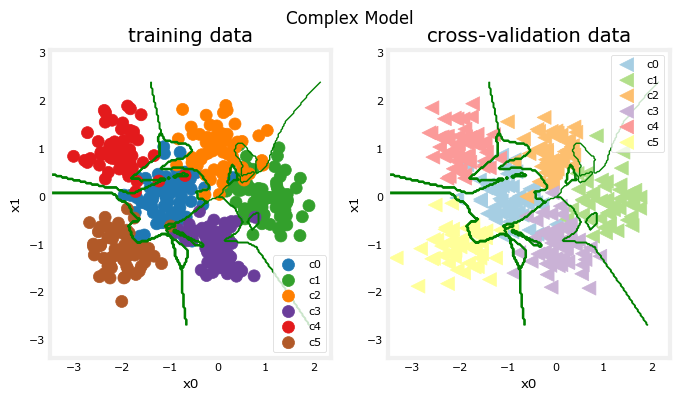

In [59]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [60]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 326us/step
categorization error, training, complex model: 0.007
categorization error, cv,       complex model: 0.119


# EX 4

In [61]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation='relu'), 
        Dense(6, activation='linear'),
    ],
    name="Simple"
)

model_s.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

)


In [62]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 492us/step - loss: 1.9667
Epoch 2/1000
13/13 [==============================] - 0s 415us/step - loss: 1.6732
Epoch 3/1000
13/13 [==============================] - 0s 384us/step - loss: 1.4488
Epoch 4/1000
13/13 [==============================] - 0s 414us/step - loss: 1.2217
Epoch 5/1000
13/13 [==============================] - 0s 406us/step - loss: 1.0025
Epoch 6/1000
13/13 [==============================] - 0s 386us/step - loss: 0.8032
Epoch 7/1000
13/13 [==============================] - 0s 346us/step - loss: 0.6625
Epoch 8/1000
13/13 [==============================] - 0s 333us/step - loss: 0.5559
Epoch 9/1000
13/13 [==============================] - 0s 332us/step - loss: 0.4860
Epoch 10/1000
13/13 [==============================] - 0s 305us/step - loss: 0.4385
Epoch 11/1000
13/13 [==============================] - 0s 314us/step - loss: 0.4027
Epoch 12/1000
13/13 [==============================] - 0s 337us/step - loss: 0.3786
E

13/13 [==============================] - 0s 337us/step - loss: 0.2038
Epoch 99/1000
13/13 [==============================] - 0s 290us/step - loss: 0.1990
Epoch 100/1000
13/13 [==============================] - 0s 310us/step - loss: 0.2004
Epoch 101/1000
13/13 [==============================] - 0s 339us/step - loss: 0.2008
Epoch 102/1000
13/13 [==============================] - 0s 330us/step - loss: 0.2022
Epoch 103/1000
13/13 [==============================] - 0s 300us/step - loss: 0.2038
Epoch 104/1000
13/13 [==============================] - 0s 343us/step - loss: 0.1998
Epoch 105/1000
13/13 [==============================] - 0s 311us/step - loss: 0.1980
Epoch 106/1000
13/13 [==============================] - 0s 332us/step - loss: 0.1978
Epoch 107/1000
13/13 [==============================] - 0s 327us/step - loss: 0.1966
Epoch 108/1000
13/13 [==============================] - 0s 339us/step - loss: 0.1977
Epoch 109/1000
13/13 [==============================] - 0s 291us/step - loss: 0.1

13/13 [==============================] - 0s 311us/step - loss: 0.1917
Epoch 195/1000
13/13 [==============================] - 0s 301us/step - loss: 0.1928
Epoch 196/1000
13/13 [==============================] - 0s 309us/step - loss: 0.1928
Epoch 197/1000
13/13 [==============================] - 0s 288us/step - loss: 0.1936
Epoch 198/1000
13/13 [==============================] - 0s 310us/step - loss: 0.1956
Epoch 199/1000
13/13 [==============================] - 0s 301us/step - loss: 0.1977
Epoch 200/1000
13/13 [==============================] - 0s 295us/step - loss: 0.1926
Epoch 201/1000
13/13 [==============================] - 0s 305us/step - loss: 0.1927
Epoch 202/1000
13/13 [==============================] - 0s 381us/step - loss: 0.1921
Epoch 203/1000
13/13 [==============================] - 0s 343us/step - loss: 0.1924
Epoch 204/1000
13/13 [==============================] - 0s 337us/step - loss: 0.1934
Epoch 205/1000
13/13 [==============================] - 0s 355us/step - loss: 0.

13/13 [==============================] - 0s 304us/step - loss: 0.1930
Epoch 291/1000
13/13 [==============================] - 0s 317us/step - loss: 0.1901
Epoch 292/1000
13/13 [==============================] - 0s 350us/step - loss: 0.1902
Epoch 293/1000
13/13 [==============================] - 0s 301us/step - loss: 0.1919
Epoch 294/1000
13/13 [==============================] - 0s 324us/step - loss: 0.1891
Epoch 295/1000
13/13 [==============================] - 0s 342us/step - loss: 0.1959
Epoch 296/1000
13/13 [==============================] - 0s 334us/step - loss: 0.1914
Epoch 297/1000
13/13 [==============================] - 0s 315us/step - loss: 0.1931
Epoch 298/1000
13/13 [==============================] - 0s 344us/step - loss: 0.1927
Epoch 299/1000
13/13 [==============================] - 0s 334us/step - loss: 0.1916
Epoch 300/1000
13/13 [==============================] - 0s 312us/step - loss: 0.1929
Epoch 301/1000
13/13 [==============================] - 0s 308us/step - loss: 0.

13/13 [==============================] - 0s 330us/step - loss: 0.1885
Epoch 387/1000
13/13 [==============================] - 0s 297us/step - loss: 0.1884
Epoch 388/1000
13/13 [==============================] - 0s 309us/step - loss: 0.1889
Epoch 389/1000
13/13 [==============================] - 0s 347us/step - loss: 0.1910
Epoch 390/1000
13/13 [==============================] - 0s 314us/step - loss: 0.1896
Epoch 391/1000
13/13 [==============================] - 0s 296us/step - loss: 0.1858
Epoch 392/1000
13/13 [==============================] - 0s 338us/step - loss: 0.1873
Epoch 393/1000
13/13 [==============================] - 0s 348us/step - loss: 0.1860
Epoch 394/1000
13/13 [==============================] - 0s 313us/step - loss: 0.1854
Epoch 395/1000
13/13 [==============================] - 0s 315us/step - loss: 0.1854
Epoch 396/1000
13/13 [==============================] - 0s 330us/step - loss: 0.1887
Epoch 397/1000
13/13 [==============================] - 0s 313us/step - loss: 0.

13/13 [==============================] - 0s 307us/step - loss: 0.1853
Epoch 483/1000
13/13 [==============================] - 0s 330us/step - loss: 0.1869
Epoch 484/1000
13/13 [==============================] - 0s 327us/step - loss: 0.1864
Epoch 485/1000
13/13 [==============================] - 0s 318us/step - loss: 0.1879
Epoch 486/1000
13/13 [==============================] - 0s 316us/step - loss: 0.1845
Epoch 487/1000
13/13 [==============================] - 0s 330us/step - loss: 0.1854
Epoch 488/1000
13/13 [==============================] - 0s 283us/step - loss: 0.1867
Epoch 489/1000
13/13 [==============================] - 0s 305us/step - loss: 0.1841
Epoch 490/1000
13/13 [==============================] - 0s 305us/step - loss: 0.1905
Epoch 491/1000
13/13 [==============================] - 0s 295us/step - loss: 0.1856
Epoch 492/1000
13/13 [==============================] - 0s 299us/step - loss: 0.1850
Epoch 493/1000
13/13 [==============================] - 0s 325us/step - loss: 0.

13/13 [==============================] - 0s 296us/step - loss: 0.1872
Epoch 579/1000
13/13 [==============================] - 0s 307us/step - loss: 0.1833
Epoch 580/1000
13/13 [==============================] - 0s 321us/step - loss: 0.1864
Epoch 581/1000
13/13 [==============================] - 0s 359us/step - loss: 0.1828
Epoch 582/1000
13/13 [==============================] - 0s 311us/step - loss: 0.1825
Epoch 583/1000
13/13 [==============================] - 0s 326us/step - loss: 0.1832
Epoch 584/1000
13/13 [==============================] - 0s 369us/step - loss: 0.1849
Epoch 585/1000
13/13 [==============================] - 0s 300us/step - loss: 0.1817
Epoch 586/1000
13/13 [==============================] - 0s 310us/step - loss: 0.1840
Epoch 587/1000
13/13 [==============================] - 0s 348us/step - loss: 0.1838
Epoch 588/1000
13/13 [==============================] - 0s 318us/step - loss: 0.1824
Epoch 589/1000
13/13 [==============================] - 0s 302us/step - loss: 0.

13/13 [==============================] - 0s 320us/step - loss: 0.1910
Epoch 675/1000
13/13 [==============================] - 0s 325us/step - loss: 0.1833
Epoch 676/1000
13/13 [==============================] - 0s 309us/step - loss: 0.1829
Epoch 677/1000
13/13 [==============================] - 0s 304us/step - loss: 0.1839
Epoch 678/1000
13/13 [==============================] - 0s 341us/step - loss: 0.1831
Epoch 679/1000
13/13 [==============================] - 0s 324us/step - loss: 0.1905
Epoch 680/1000
13/13 [==============================] - 0s 302us/step - loss: 0.1837
Epoch 681/1000
13/13 [==============================] - 0s 321us/step - loss: 0.1819
Epoch 682/1000
13/13 [==============================] - 0s 320us/step - loss: 0.1844
Epoch 683/1000
13/13 [==============================] - 0s 312us/step - loss: 0.1895
Epoch 684/1000
13/13 [==============================] - 0s 323us/step - loss: 0.1797
Epoch 685/1000
13/13 [==============================] - 0s 329us/step - loss: 0.

13/13 [==============================] - 0s 310us/step - loss: 0.1811
Epoch 771/1000
13/13 [==============================] - 0s 322us/step - loss: 0.1844
Epoch 772/1000
13/13 [==============================] - 0s 341us/step - loss: 0.1830
Epoch 773/1000
13/13 [==============================] - 0s 335us/step - loss: 0.1843
Epoch 774/1000
13/13 [==============================] - 0s 373us/step - loss: 0.1841
Epoch 775/1000
13/13 [==============================] - 0s 308us/step - loss: 0.1824
Epoch 776/1000
13/13 [==============================] - 0s 323us/step - loss: 0.1804
Epoch 777/1000
13/13 [==============================] - 0s 336us/step - loss: 0.1834
Epoch 778/1000
13/13 [==============================] - 0s 306us/step - loss: 0.1843
Epoch 779/1000
13/13 [==============================] - 0s 320us/step - loss: 0.1835
Epoch 780/1000
13/13 [==============================] - 0s 388us/step - loss: 0.1883
Epoch 781/1000
13/13 [==============================] - 0s 315us/step - loss: 0.

13/13 [==============================] - 0s 302us/step - loss: 0.1835
Epoch 867/1000
13/13 [==============================] - 0s 289us/step - loss: 0.1827
Epoch 868/1000
13/13 [==============================] - 0s 298us/step - loss: 0.1881
Epoch 869/1000
13/13 [==============================] - 0s 290us/step - loss: 0.1817
Epoch 870/1000
13/13 [==============================] - 0s 308us/step - loss: 0.1838
Epoch 871/1000
13/13 [==============================] - 0s 295us/step - loss: 0.1814
Epoch 872/1000
13/13 [==============================] - 0s 329us/step - loss: 0.1826
Epoch 873/1000
13/13 [==============================] - 0s 307us/step - loss: 0.1858
Epoch 874/1000
13/13 [==============================] - 0s 408us/step - loss: 0.1804
Epoch 875/1000
13/13 [==============================] - 0s 311us/step - loss: 0.1837
Epoch 876/1000
13/13 [==============================] - 0s 310us/step - loss: 0.1814
Epoch 877/1000
13/13 [==============================] - 0s 376us/step - loss: 0.

13/13 [==============================] - 0s 294us/step - loss: 0.1815
Epoch 963/1000
13/13 [==============================] - 0s 312us/step - loss: 0.1927
Epoch 964/1000
13/13 [==============================] - 0s 335us/step - loss: 0.1814
Epoch 965/1000
13/13 [==============================] - 0s 312us/step - loss: 0.1831
Epoch 966/1000
13/13 [==============================] - 0s 301us/step - loss: 0.1807
Epoch 967/1000
13/13 [==============================] - 0s 332us/step - loss: 0.1819
Epoch 968/1000
13/13 [==============================] - 0s 339us/step - loss: 0.1861
Epoch 969/1000
13/13 [==============================] - 0s 299us/step - loss: 0.1837
Epoch 970/1000
13/13 [==============================] - 0s 312us/step - loss: 0.1830
Epoch 971/1000
13/13 [==============================] - 0s 335us/step - loss: 0.1811
Epoch 972/1000
13/13 [==============================] - 0s 323us/step - loss: 0.1848
Epoch 973/1000
13/13 [==============================] - 0s 295us/step - loss: 0.

In [63]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 18        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


AssertionError: Wrong loss function. Expected <class 'keras.optimizers.adam.Adam'>, but got <keras.optimizers.legacy.adam.Adam object at 0x294ba9570>

In [ ]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

In [64]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 376us/step
categorization error, training, simple model, 0.072, complex model: 0.007
categorization error, cv,       simple model, 0.066, complex model: 0.119


# Part 6

# EX 5

In [65]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),  
        Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(6, activation="linear")
    ], name= "ComplexRegularlized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)



In [66]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 593us/step - loss: 4.4637
Epoch 2/1000
13/13 [==============================] - 0s 500us/step - loss: 1.6348
Epoch 3/1000
13/13 [==============================] - 0s 567us/step - loss: 1.2948
Epoch 4/1000
13/13 [==============================] - 0s 520us/step - loss: 1.0612
Epoch 5/1000
13/13 [==============================] - 0s 570us/step - loss: 0.9928
Epoch 6/1000
13/13 [==============================] - 0s 551us/step - loss: 0.9560
Epoch 7/1000
13/13 [==============================] - 0s 503us/step - loss: 0.9313
Epoch 8/1000
13/13 [==============================] - 0s 498us/step - loss: 0.8729
Epoch 9/1000
13/13 [==============================] - 0s 494us/step - loss: 0.8160
Epoch 10/1000
13/13 [==============================] - 0s 520us/step - loss: 0.7748
Epoch 11/1000
13/13 [==============================] - 0s 433us/step - loss: 0.7609
Epoch 12/1000
13/13 [==============================] - 0s 470us/step - loss: 0.7640
E

13/13 [==============================] - 0s 458us/step - loss: 0.4786
Epoch 99/1000
13/13 [==============================] - 0s 417us/step - loss: 0.5147
Epoch 100/1000
13/13 [==============================] - 0s 453us/step - loss: 0.5113
Epoch 101/1000
13/13 [==============================] - 0s 493us/step - loss: 0.5011
Epoch 102/1000
13/13 [==============================] - 0s 433us/step - loss: 0.4821
Epoch 103/1000
13/13 [==============================] - 0s 458us/step - loss: 0.4814
Epoch 104/1000
13/13 [==============================] - 0s 451us/step - loss: 0.4683
Epoch 105/1000
13/13 [==============================] - 0s 461us/step - loss: 0.5202
Epoch 106/1000
13/13 [==============================] - 0s 512us/step - loss: 0.5002
Epoch 107/1000
13/13 [==============================] - 0s 439us/step - loss: 0.4787
Epoch 108/1000
13/13 [==============================] - 0s 466us/step - loss: 0.4765
Epoch 109/1000
13/13 [==============================] - 0s 417us/step - loss: 0.4

13/13 [==============================] - 0s 416us/step - loss: 0.4201
Epoch 195/1000
13/13 [==============================] - 0s 478us/step - loss: 0.4052
Epoch 196/1000
13/13 [==============================] - 0s 462us/step - loss: 0.4023
Epoch 197/1000
13/13 [==============================] - 0s 469us/step - loss: 0.4246
Epoch 198/1000
13/13 [==============================] - 0s 457us/step - loss: 0.4008
Epoch 199/1000
13/13 [==============================] - 0s 463us/step - loss: 0.4105
Epoch 200/1000
13/13 [==============================] - 0s 484us/step - loss: 0.4106
Epoch 201/1000
13/13 [==============================] - 0s 449us/step - loss: 0.4335
Epoch 202/1000
13/13 [==============================] - 0s 486us/step - loss: 0.3991
Epoch 203/1000
13/13 [==============================] - 0s 454us/step - loss: 0.4082
Epoch 204/1000
13/13 [==============================] - 0s 467us/step - loss: 0.4083
Epoch 205/1000
13/13 [==============================] - 0s 447us/step - loss: 0.

13/13 [==============================] - 0s 462us/step - loss: 0.3877
Epoch 291/1000
13/13 [==============================] - 0s 450us/step - loss: 0.3919
Epoch 292/1000
13/13 [==============================] - 0s 482us/step - loss: 0.3695
Epoch 293/1000
13/13 [==============================] - 0s 469us/step - loss: 0.3790
Epoch 294/1000
13/13 [==============================] - 0s 473us/step - loss: 0.3999
Epoch 295/1000
13/13 [==============================] - 0s 443us/step - loss: 0.4117
Epoch 296/1000
13/13 [==============================] - 0s 447us/step - loss: 0.3829
Epoch 297/1000
13/13 [==============================] - 0s 469us/step - loss: 0.3917
Epoch 298/1000
13/13 [==============================] - 0s 437us/step - loss: 0.3970
Epoch 299/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3931
Epoch 300/1000
13/13 [==============================] - 0s 456us/step - loss: 0.4291
Epoch 301/1000
13/13 [==============================] - 0s 481us/step - loss: 0.

13/13 [==============================] - 0s 474us/step - loss: 0.3561
Epoch 387/1000
13/13 [==============================] - 0s 449us/step - loss: 0.3752
Epoch 388/1000
13/13 [==============================] - 0s 483us/step - loss: 0.3753
Epoch 389/1000
13/13 [==============================] - 0s 453us/step - loss: 0.3650
Epoch 390/1000
13/13 [==============================] - 0s 518us/step - loss: 0.3514
Epoch 391/1000
13/13 [==============================] - 0s 492us/step - loss: 0.3660
Epoch 392/1000
13/13 [==============================] - 0s 438us/step - loss: 0.3802
Epoch 393/1000
13/13 [==============================] - 0s 481us/step - loss: 0.3576
Epoch 394/1000
13/13 [==============================] - 0s 446us/step - loss: 0.3600
Epoch 395/1000
13/13 [==============================] - 0s 468us/step - loss: 0.3891
Epoch 396/1000
13/13 [==============================] - 0s 460us/step - loss: 0.3784
Epoch 397/1000
13/13 [==============================] - 0s 449us/step - loss: 0.

13/13 [==============================] - 0s 465us/step - loss: 0.3718
Epoch 483/1000
13/13 [==============================] - 0s 462us/step - loss: 0.3758
Epoch 484/1000
13/13 [==============================] - 0s 437us/step - loss: 0.3690
Epoch 485/1000
13/13 [==============================] - 0s 472us/step - loss: 0.3745
Epoch 486/1000
13/13 [==============================] - 0s 452us/step - loss: 0.3491
Epoch 487/1000
13/13 [==============================] - 0s 469us/step - loss: 0.3426
Epoch 488/1000
13/13 [==============================] - 0s 458us/step - loss: 0.3481
Epoch 489/1000
13/13 [==============================] - 0s 445us/step - loss: 0.3352
Epoch 490/1000
13/13 [==============================] - 0s 464us/step - loss: 0.3516
Epoch 491/1000
13/13 [==============================] - 0s 440us/step - loss: 0.3660
Epoch 492/1000
13/13 [==============================] - 0s 499us/step - loss: 0.3642
Epoch 493/1000
13/13 [==============================] - 0s 449us/step - loss: 0.

13/13 [==============================] - 0s 494us/step - loss: 0.4167
Epoch 579/1000
13/13 [==============================] - 0s 447us/step - loss: 0.3529
Epoch 580/1000
13/13 [==============================] - 0s 479us/step - loss: 0.3319
Epoch 581/1000
13/13 [==============================] - 0s 448us/step - loss: 0.3578
Epoch 582/1000
13/13 [==============================] - 0s 484us/step - loss: 0.3469
Epoch 583/1000
13/13 [==============================] - 0s 457us/step - loss: 0.3511
Epoch 584/1000
13/13 [==============================] - 0s 448us/step - loss: 0.3727
Epoch 585/1000
13/13 [==============================] - 0s 464us/step - loss: 0.3792
Epoch 586/1000
13/13 [==============================] - 0s 448us/step - loss: 0.3552
Epoch 587/1000
13/13 [==============================] - 0s 512us/step - loss: 0.3451
Epoch 588/1000
13/13 [==============================] - 0s 437us/step - loss: 0.3337
Epoch 589/1000
13/13 [==============================] - 0s 496us/step - loss: 0.

13/13 [==============================] - 0s 480us/step - loss: 0.3940
Epoch 675/1000
13/13 [==============================] - 0s 454us/step - loss: 0.3368
Epoch 676/1000
13/13 [==============================] - 0s 486us/step - loss: 0.3341
Epoch 677/1000
13/13 [==============================] - 0s 450us/step - loss: 0.3289
Epoch 678/1000
13/13 [==============================] - 0s 478us/step - loss: 0.3264
Epoch 679/1000
13/13 [==============================] - 0s 442us/step - loss: 0.3385
Epoch 680/1000
13/13 [==============================] - 0s 472us/step - loss: 0.3352
Epoch 681/1000
13/13 [==============================] - 0s 473us/step - loss: 0.3488
Epoch 682/1000
13/13 [==============================] - 0s 455us/step - loss: 0.3345
Epoch 683/1000
13/13 [==============================] - 0s 460us/step - loss: 0.3317
Epoch 684/1000
13/13 [==============================] - 0s 456us/step - loss: 0.3360
Epoch 685/1000
13/13 [==============================] - 0s 475us/step - loss: 0.

13/13 [==============================] - 0s 458us/step - loss: 0.3226
Epoch 771/1000
13/13 [==============================] - 0s 431us/step - loss: 0.3385
Epoch 772/1000
13/13 [==============================] - 0s 470us/step - loss: 0.3382
Epoch 773/1000
13/13 [==============================] - 0s 448us/step - loss: 0.3427
Epoch 774/1000
13/13 [==============================] - 0s 441us/step - loss: 0.3756
Epoch 775/1000
13/13 [==============================] - 0s 454us/step - loss: 0.3378
Epoch 776/1000
13/13 [==============================] - 0s 448us/step - loss: 0.3636
Epoch 777/1000
13/13 [==============================] - 0s 479us/step - loss: 0.3611
Epoch 778/1000
13/13 [==============================] - 0s 438us/step - loss: 0.3229
Epoch 779/1000
13/13 [==============================] - 0s 466us/step - loss: 0.3320
Epoch 780/1000
13/13 [==============================] - 0s 497us/step - loss: 0.3396
Epoch 781/1000
13/13 [==============================] - 0s 435us/step - loss: 0.

13/13 [==============================] - 0s 478us/step - loss: 0.3671
Epoch 867/1000
13/13 [==============================] - 0s 464us/step - loss: 0.3294
Epoch 868/1000
13/13 [==============================] - 0s 424us/step - loss: 0.3316
Epoch 869/1000
13/13 [==============================] - 0s 477us/step - loss: 0.3391
Epoch 870/1000
13/13 [==============================] - 0s 445us/step - loss: 0.3594
Epoch 871/1000
13/13 [==============================] - 0s 456us/step - loss: 0.3546
Epoch 872/1000
13/13 [==============================] - 0s 466us/step - loss: 0.3344
Epoch 873/1000
13/13 [==============================] - 0s 431us/step - loss: 0.3223
Epoch 874/1000
13/13 [==============================] - 0s 469us/step - loss: 0.3357
Epoch 875/1000
13/13 [==============================] - 0s 441us/step - loss: 0.3297
Epoch 876/1000
13/13 [==============================] - 0s 472us/step - loss: 0.3309
Epoch 877/1000
13/13 [==============================] - 0s 449us/step - loss: 0.

13/13 [==============================] - 0s 437us/step - loss: 0.3135
Epoch 963/1000
13/13 [==============================] - 0s 470us/step - loss: 0.3373
Epoch 964/1000
13/13 [==============================] - 0s 462us/step - loss: 0.3170
Epoch 965/1000
13/13 [==============================] - 0s 459us/step - loss: 0.3171
Epoch 966/1000
13/13 [==============================] - 0s 490us/step - loss: 0.3285
Epoch 967/1000
13/13 [==============================] - 0s 437us/step - loss: 0.3240
Epoch 968/1000
13/13 [==============================] - 0s 468us/step - loss: 0.3273
Epoch 969/1000
13/13 [==============================] - 0s 503us/step - loss: 0.3687
Epoch 970/1000
13/13 [==============================] - 0s 481us/step - loss: 0.3692
Epoch 971/1000
13/13 [==============================] - 0s 455us/step - loss: 0.3366
Epoch 972/1000
13/13 [==============================] - 0s 448us/step - loss: 0.3159
Epoch 973/1000
13/13 [==============================] - 0s 469us/step - loss: 0.

In [67]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "ComplexRegularlized"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 120)               360       
                                                                 
 dense_12 (Dense)            (None, 40)                4840      
                                                                 
 dense_13 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
ddd


AssertionError: Wrong loss function. Expected <class 'keras.optimizers.adam.Adam'>, but got <keras.optimizers.legacy.adam.Adam object at 0x28ff23f10>

In [ ]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

In [ ]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

# Part 7

In [ ]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


In [ ]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

In [ ]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)